In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

2022-12-27 22:48:29.869659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 22:48:30.260917: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-27 22:48:30.293527: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-27 22:48:30.293559: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [2]:
fit_verbosity = 1

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
#Our data are not vectors, but matrices. We need to reshape them to vectors. We add 1 dimesnion to the end of the shape.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#Y is just a number, but we need to convert it to a vector with 10 elements. The element with index equal to the number is 1, the rest are 0.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
#We print the first vector y to check if it is correct.

x_train shape: (60000, 28, 28, 1) y_train shape: (60000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
#Now we can normalize the data. We divide by 255 because the values are between 0 and 255.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [34]:
#We can now construct the model. We use the Kerass Sequential API.

model = keras.Sequential()

#First we are going to do Conv2D then pooling then flatten.
#For the first test we use padding='valid' and strides=(1, 1) as classic Conv2D and without dropout.
model.add(keras.layers.Conv2D(8, (3, 3), padding='valid',strides=(1, 1), input_shape=(28, 28, 1)))
model.activation = 'relu'
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Conv2D(16, (3, 3), padding='valid',strides=(1, 1)))
model.activation = 'relu'
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Flatten())

#we add a dense layer with 10 neurons
model.add(keras.layers.Dense(10))
model.activation = 'relu'
# model.add(keras.layers.Dropout(0.2))

#We finallys add a dense layer with 10 neurons and softmax activation to have the probabilities for each class.
model.add(keras.layers.Dense(10, activation='softmax'))


In [35]:
#We can now compile the model by adding the loss function and the optimizers : 

model.compile(optimizer='adam',loss='mae',metrics=['accuracy'])

In [36]:
#You want to describe your mode, execute the following line :
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 10)               

In [37]:
#We must now fit the model : 
K.set_value(model.optimizer.learning_rate, 0.0001)
print("Learning rate is:", model.optimizer.learning_rate.numpy())

history = model.fit(
    x_train, y_train,
    validation_data=(x_test,y_test),
    batch_size=100, 
    epochs=10
)

Learning rate is: 1e-04
Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 0.1408 - accuracy: 0.3292 - val_loss: 0.0891 - val_accuracy: 0.6234
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0636 - accuracy: 0.7325 - val_loss: 0.0424 - val_accuracy: 0.8224
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0370 - accuracy: 0.8426 - val_loss: 0.0302 - val_accuracy: 0.8687
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0285 - accuracy: 0.8752 - val_loss: 0.0246 - val_accuracy: 0.8916
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0243 - accuracy: 0.8910 - val_loss: 0.0217 - val_accuracy: 0.9046
Epoch 6/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0216 - accuracy: 0.9018 - val_loss: 0.0195 - val_accuracy: 0.9124
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.0197 - accuracy: 0.9103 - val_loss: 0.0183 - va

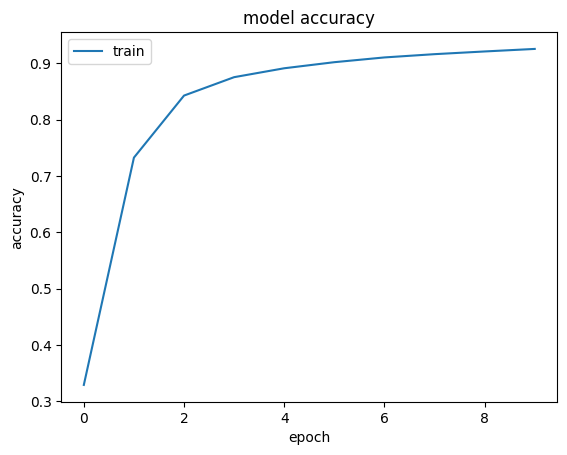

In [43]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()